# Importing Libraries & Data

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('avocado/avocado.csv')

# Understanding the Data

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df = df.drop(columns = ['Unnamed: 0','Total Bags','Small Bags','Large Bags','XLarge Bags'], axis = 1) #these columns did not exist in the problem statement 

In [5]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany


In [6]:
df.shape

(18249, 9)

In [7]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
type             object
year              int64
region           object
dtype: object

In [8]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
type            0
year            0
region          0
dtype: int64

In [9]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
type                2
year                4
region             54
dtype: int64

In [10]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [11]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [12]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,2018.000000


# Understanding Features

<Axes: xlabel='year', ylabel='count'>

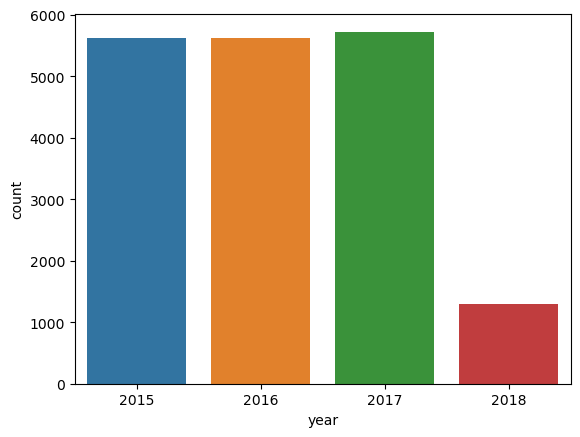

In [13]:
sns.countplot(x='year', data = df)

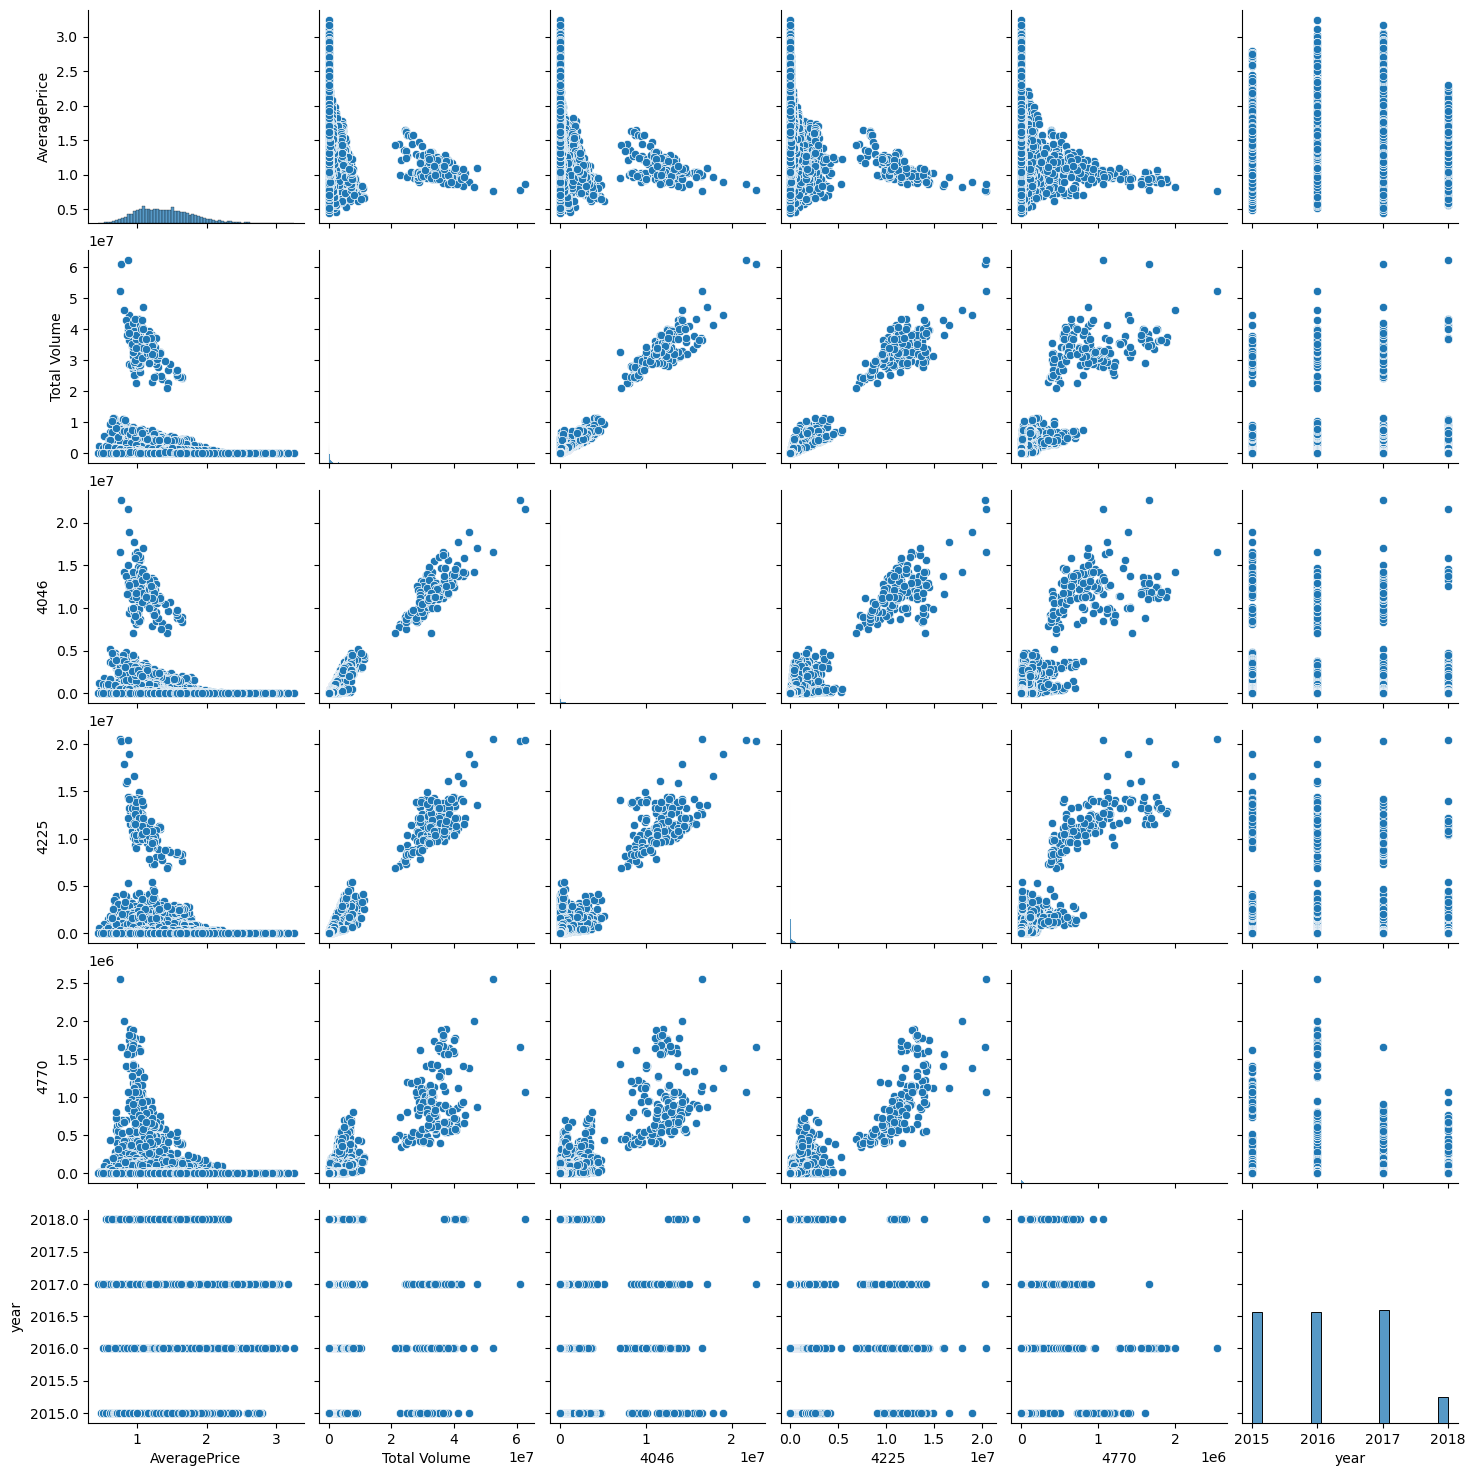

In [14]:
sns.pairplot(df, palette="colorblind")
plt.show()

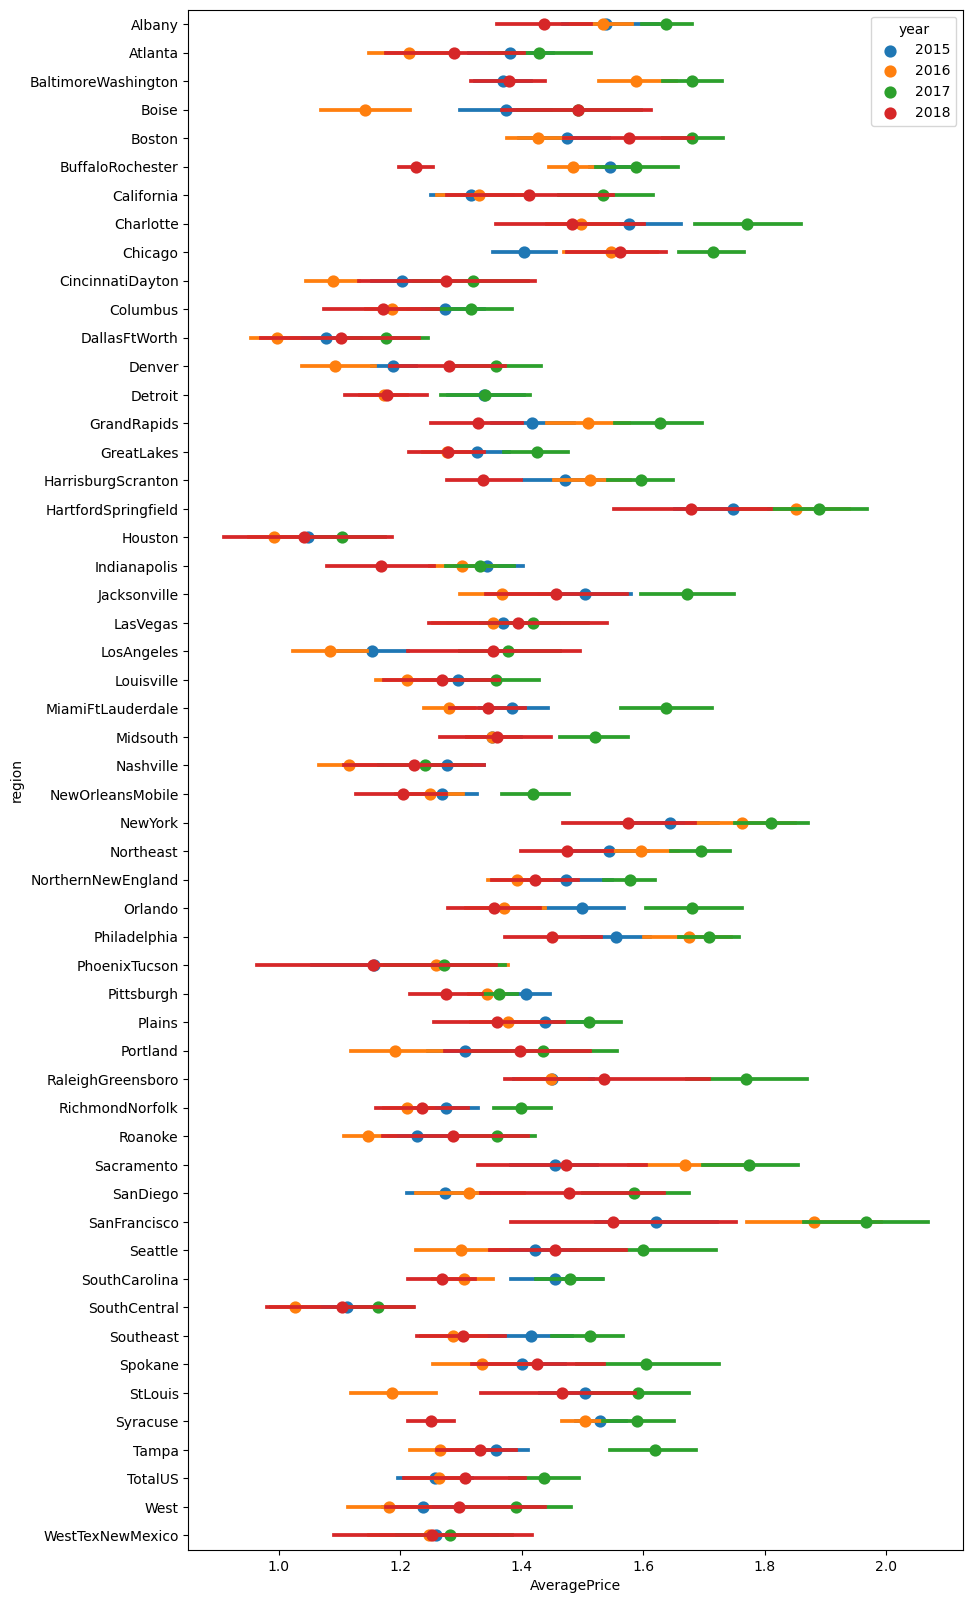

In [15]:
plt.figure(figsize = (10, 20), facecolor = "white")
sns.pointplot(x='AveragePrice',y='region',data=df,hue='year',join=False)
plt.show()

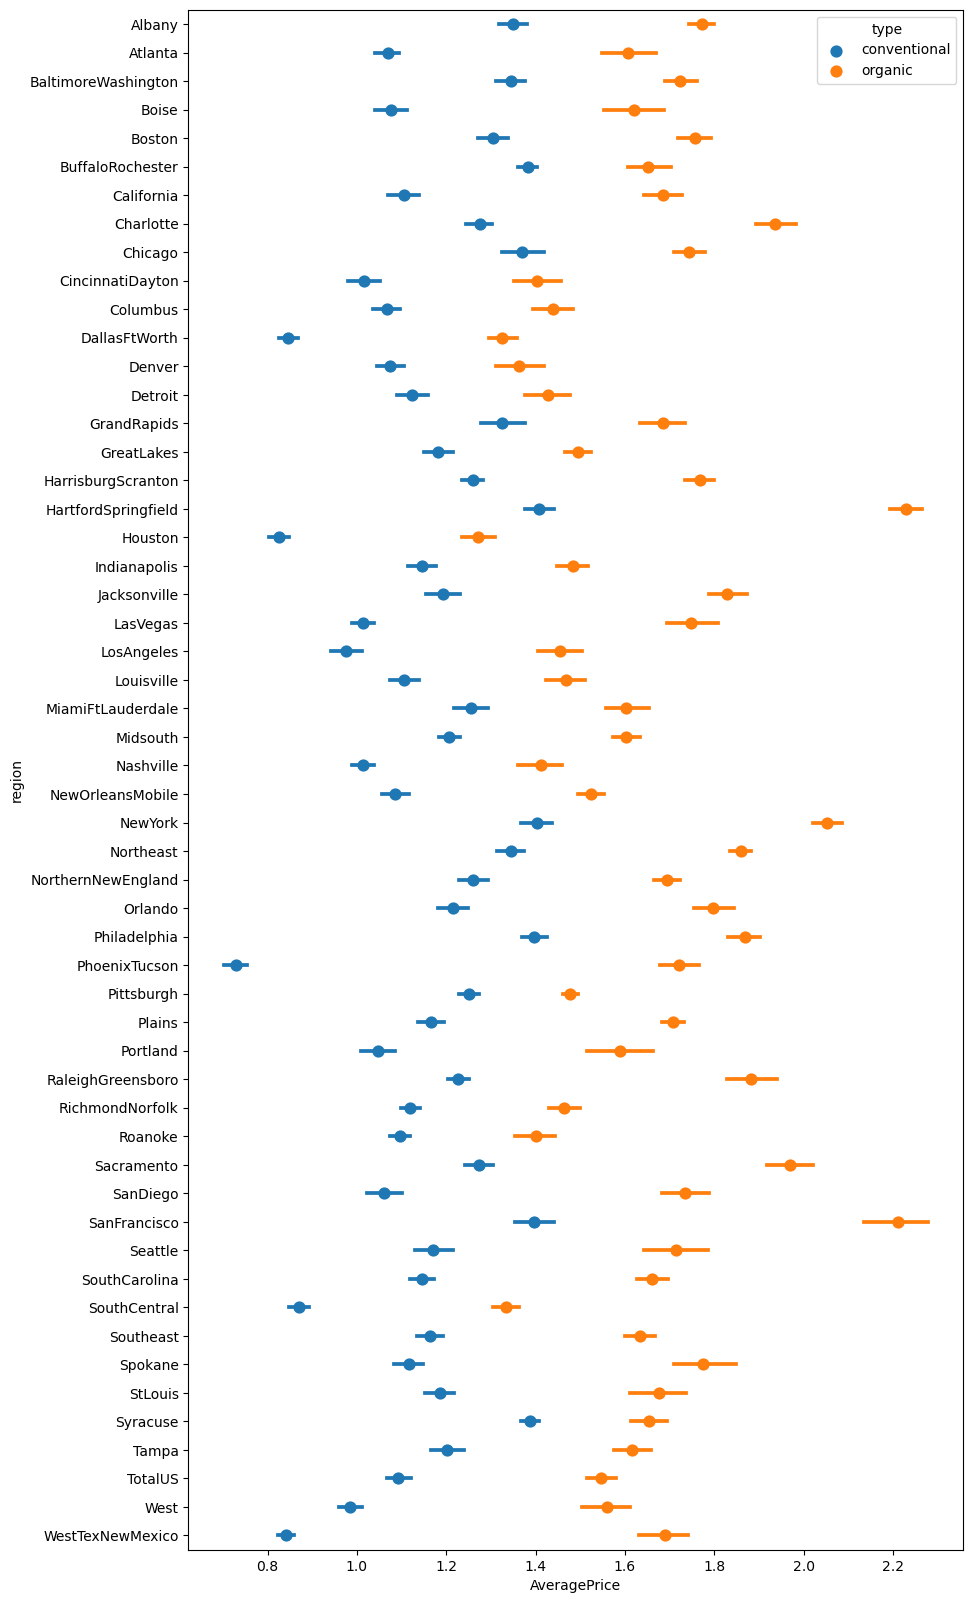

In [16]:
plt.figure(figsize = (10, 20), facecolor = "white")
sns.pointplot(x='AveragePrice',y='region',data=df,hue='type',join=False)
plt.show()

# Encoding object data to Numberic data

In [17]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))
df

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,51.0,1.33,64236.62,1036.74,54454.85,48.16,0.0,2015,0.0
1,50.0,1.35,54876.98,674.28,44638.81,58.33,0.0,2015,0.0
2,49.0,0.93,118220.22,794.70,109149.67,130.50,0.0,2015,0.0
3,48.0,1.08,78992.15,1132.00,71976.41,72.58,0.0,2015,0.0
4,47.0,1.28,51039.60,941.48,43838.39,75.78,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...
18244,161.0,1.63,17074.83,2046.96,1529.20,0.00,1.0,2018,53.0
18245,160.0,1.71,13888.04,1191.70,3431.50,0.00,1.0,2018,53.0
18246,159.0,1.87,13766.76,1191.92,2452.79,727.94,1.0,2018,53.0
18247,158.0,1.93,16205.22,1527.63,2981.04,727.01,1.0,2018,53.0


# Outlier Check

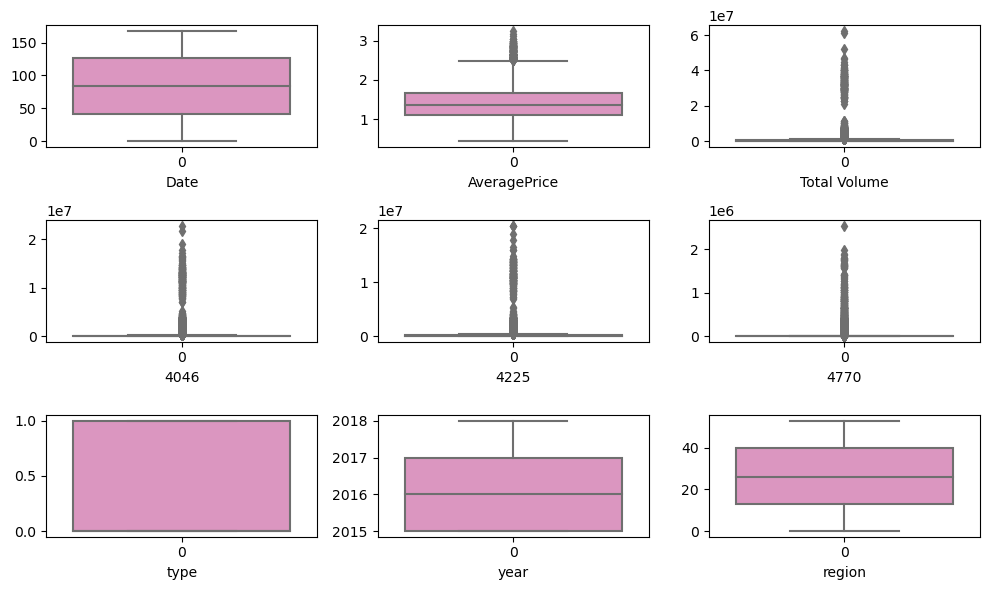

In [18]:
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for c in df.columns:
    if plotnumber <= 9:
        x=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[c], palette = "Set2_r")
        plt.xlabel(c, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

# Correlation Check

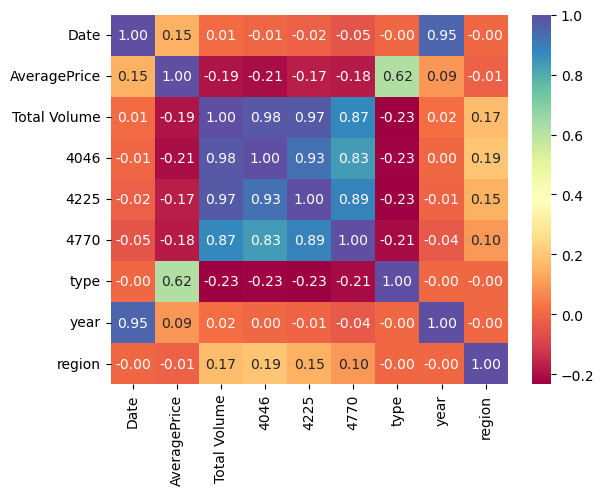

In [19]:
corr = df.corr()
sns.heatmap(corr,annot=True,fmt='0.2f',cmap='Spectral')
plt.show()

In [20]:
corr['region'].sort_values(ascending = False)

region          1.000000
4046            0.192073
Total Volume    0.174176
4225            0.145726
4770            0.095252
year           -0.000055
Date           -0.000101
type           -0.000280
AveragePrice   -0.011716
Name: region, dtype: float64

In [21]:
corr['AveragePrice'].sort_values(ascending = False)

AveragePrice    1.000000
type            0.615845
Date            0.145514
year            0.093197
region         -0.011716
4225           -0.172928
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64

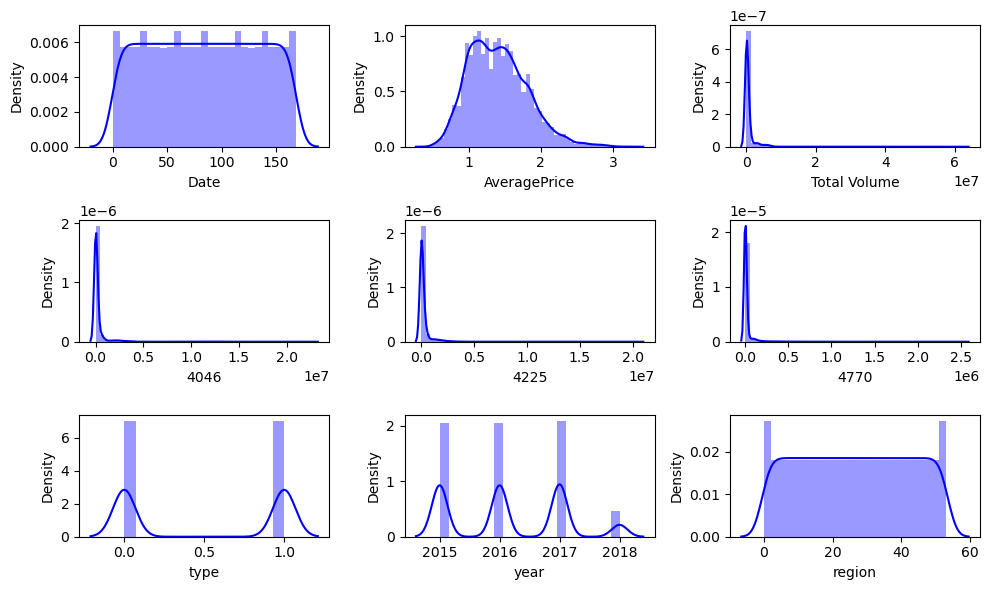

In [22]:
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for c in df.columns:
    if plotnumber <= 9:
        x=plt.subplot(3,3,plotnumber)
        sns.distplot(df[c],color = "b")
        plt.xlabel(c, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

# Skewness Check

In [23]:
skew = df.skew()
skew

Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
type             0.000329
year             0.215339
region           0.000030
dtype: float64

In [24]:
for i,score in skew.iteritems():
    if score > 0.5 or score < -0.5:
        df[i] = np.cbrt(df[i])
df.skew()

Date            0.000117
AveragePrice    0.070540
Total Volume    2.236143
4046            2.277861
4225            2.130378
4770            2.316048
type            0.000329
year            0.215339
region          0.000030
dtype: float64

In [25]:
for i,score in skew.iteritems():
    if score > 0.5 or score < -0.5:
        df[i] = np.cbrt(df[i])
df.skew()

Date            0.000117
AveragePrice   -0.098711
Total Volume    0.624128
4046            0.296549
4225            0.248376
4770           -0.014697
type            0.000329
year            0.215339
region          0.000030
dtype: float64

In [ ]:
Assign feature and target data

In [26]:
x_class = df.drop('region', axis =1)#for classification
y_class = df['region']#for classification
x_reg = df.drop('AveragePrice', axis =1)#for regression
y_reg = df['AveragePrice']#for regression

# Model Creation for Regression

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x_reg), columns = x_reg.columns)
x

,Date,Total Volume,4046,4225,4770,type,year,region
0,-0.676360,-0.224969,-0.678881,0.247619,-0.085030,-0.999836,-1.221282,-1.700252
1,-0.696857,-0.288169,-0.773376,0.170103,-0.058762,-0.999836,-1.221282,-1.700252
2,-0.717355,0.030537,-0.737814,0.532667,0.057967,-0.999836,-1.221282,-1.700252
3,-0.737853,-0.140288,-0.659010,0.359339,-0.028103,-0.999836,-1.221282,-1.700252
4,-0.758350,-0.316892,-0.700447,0.163131,-0.021963,-0.999836,-1.221282,-1.700252
...,...,...,...,...,...,...,...,...
18244,1.578371,-0.723757,-0.519922,-0.915081,-1.305897,1.000164,1.970504,1.700811
18245,1.557874,-0.795118,-0.647302,-0.690885,-1.305897,1.000164,1.970504,1.700811
18246,1.537376,-0.798112,-0.647260,-0.786473,0.344977,1.000164,1.970504,1.700811
18247,1.516879,-0.741969,-0.589777,-0.731382,0.344742,1.000164,1.970504,1.700811


In [56]:
vif

,VIF values,Features
0,1.938658,AveragePrice
1,23.885527,Total Volume
2,6.726683,4046
3,11.159456,4225
4,3.910682,4770
5,3.268035,type
6,1.155013,year


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [58]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y_reg,test_size=0.3, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print(maxAccu," at ",maxRS)

0.5452899243577648  at  113


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y_reg, test_size = 0.30, random_state = maxRS)

In [61]:
lr = LinearRegression()
lr.fit(x_train,y_train)
plr = lr.predict(x_test)
ptrain = lr.predict(x_train)
print(lr)
print('r2_score :',r2_score(y_test,plr))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_squared_error :',mean_squared_error(y_test,plr))
print('mean_absolute_error :',mean_absolute_error(y_test,plr))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,plr)))

LinearRegression()
r2_score : 0.5452899243577648
r2_score on train data : 51.00096123434212
mean_squared_error : 0.0005036691966221558
mean_absolute_error : 0.017739760270568408
root mean squared error : 0.02244257553450931


In [62]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
prfr = rfr.predict(x_test)
ptrain = rfr.predict(x_train)
print(rfr)
print('r2_score :',r2_score(y_test,prfr))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,prfr))
print('mean_squared_error :',mean_squared_error(y_test,prfr))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,prfr)))

RandomForestRegressor()
r2_score : 0.9074484537948697
r2_score on train data : 98.62154980354462
mean_absolute_error : 0.007108534493256479
mean_squared_error : 0.00010251667033644791
root mean squared error : 0.01012505162142139


In [63]:
knn = KNN()
knn.fit(x_train,y_train)
pknn = knn.predict(x_test)
ptrain = knn.predict(x_train)
print(knn)
print('r2_score :',r2_score(y_test,pknn))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,pknn))
print('mean_squared_error :',mean_squared_error(y_test,pknn))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pknn)))

KNeighborsRegressor()
r2_score : 0.8785047971514981
r2_score on train data : 92.09703023315339
mean_absolute_error : 0.007955335843958411
mean_squared_error : 0.00013457672149824458
root mean squared error : 0.011600720731844405


In [64]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pgbr = gbr.predict(x_test)
ptrain = gbr.predict(x_train)
print(gbr)
print('r2_score :',r2_score(y_test,pgbr))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,pgbr))
print('mean_squared_error :',mean_squared_error(y_test,pgbr))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pgbr)))

GradientBoostingRegressor()
r2_score : 0.7693724039419236
r2_score on train data : 75.94586415289515
mean_absolute_error : 0.012167964027865312
mean_squared_error : 0.00025545951639933495
root mean squared error : 0.01598310096318405


In [65]:
lasso = Lasso()
lasso.fit(x_train,y_train)
plasso = lasso.predict(x_test)
ptrain = lasso.predict(x_train)
print(lasso)
print('r2_score :',r2_score(y_test,plasso))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,plasso))
print('mean_squared_error :',mean_squared_error(y_test,plasso))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,plasso)))

Lasso()
r2_score : -0.0001240649979792341
r2_score on train data : 0.0
mean_absolute_error : 0.02727923159952029
mean_squared_error : 0.0011078084945193778
root mean squared error : 0.03328375721758855


In [66]:
ridge = Ridge()
ridge.fit(x_train,y_train)
pridge = ridge.predict(x_test)
ptrain = ridge.predict(x_train)
print(ridge)
print('r2_score :',r2_score(y_test,pridge))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,pridge))
print('mean_squared_error :',mean_squared_error(y_test,pridge))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pridge)))

Ridge()
r2_score : 0.545314322679078
r2_score on train data : 51.00092343843501
mean_absolute_error : 0.01773868784468754
mean_squared_error : 0.0005036421713074487
root mean squared error : 0.022441973427206635


In [67]:
from sklearn.model_selection import cross_val_score

In [69]:
score = cross_val_score(lr,x,y_reg,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,plr)-score.mean())*100)

[0.0297483  0.25689988 0.42334142 0.09064446 0.2162729 ]
0.20338139263480456
Diff b/w R2 and cross val score is : 34.19085317229602


In [70]:
score = cross_val_score(rfr,x,y_reg,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,prfr)-score.mean())*100)

[0.21926675 0.62820947 0.6425818  0.4454228  0.00904291]
0.38890474637784705
Diff b/w R2 and cross val score is : 51.85437074170227


In [71]:
score = cross_val_score(knn,x,y_reg,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,pknn)-score.mean())*100)

[-0.06043411  0.30486673  0.43268955  0.18086618 -0.11813775]
0.14797012006971338
Diff b/w R2 and cross val score is : 73.05346770817846


In [72]:
score = cross_val_score(gbr,x,y_reg,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,pgbr)-score.mean())*100)

[0.54179753 0.59712162 0.65116682 0.33497876 0.20539129]
0.4660912037847874
Diff b/w R2 and cross val score is : 30.328120015713623


In [73]:
score = cross_val_score(lasso,x,y_reg,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,plasso)-score.mean())*100)

[-2.55395177 -0.55847032 -0.02517239 -0.63310224 -0.98217542]
-0.950574427959786
Diff b/w R2 and cross val score is : 95.04503629618067


In [74]:
score = cross_val_score(ridge,x,y_reg,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,pridge)-score.mean())*100)

[0.03010824 0.25676073 0.42336278 0.09074991 0.2160642 ]
0.20340917310279344
Diff b/w R2 and cross val score is : 34.19051495762845


GridSearchCV is used as the final model as it has the best performance

In [75]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 5, 7],}

In [76]:
gscv = GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

In [77]:
gscv.best_params_

{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}

# Final Model for Regression

In [78]:
Model = GradientBoostingRegressor(learning_rate = 0.2, max_depth = 7, n_estimators = 200)
Model.fit(x_train,y_train)
pred = Model.predict(x_test)
print('r2_score :',r2_score(y_test,pred))
print('mean_absolute_error :',mean_absolute_error(y_test,pred))
print('mean_squared_error :',mean_squared_error(y_test,pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

r2_score : 0.9268554472039289
mean_absolute_error : 0.006604815791968563
mean_squared_error : 8.102010515612618e-05
root mean squared error : 0.009001116883816484


In [79]:
import pickle
filename = 'AvocadoPrice.pkl'
pickle.dump(Model,open(filename,'wb'))

In [80]:
load_model = pickle.load(open('AvocadoPrice.pkl','rb'))
result = load_model.score(x_test,y_test)
print(result*100)

92.68554472039288


# Model Creation for Classification

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x_class), columns = x_class.columns)
x

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year
0,-0.676360,-0.065862,-0.224969,-0.678881,0.247619,-0.085030,-0.999836,-1.221282
1,-0.696857,-0.014260,-0.288169,-0.773376,0.170103,-0.058762,-0.999836,-1.221282
2,-0.717355,-1.277423,0.030537,-0.737814,0.532667,0.057967,-0.999836,-1.221282
3,-0.737853,-0.776868,-0.140288,-0.659010,0.359339,-0.028103,-0.999836,-1.221282
4,-0.758350,-0.197948,-0.316892,-0.700447,0.163131,-0.021963,-0.999836,-1.221282
...,...,...,...,...,...,...,...,...
18244,1.578371,0.644761,-0.723757,-0.519922,-0.915081,-1.305897,1.000164,1.970504
18245,1.557874,0.814506,-0.795118,-0.647302,-0.690885,-1.305897,1.000164,1.970504
18246,1.537376,1.133816,-0.798112,-0.647260,-0.786473,0.344977,1.000164,1.970504
18247,1.516879,1.247320,-0.741969,-0.589777,-0.731382,0.344742,1.000164,1.970504


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,11.131171,Date
1,2.082468,AveragePrice
2,24.202852,Total Volume
3,6.739896,4046
4,11.314052,4225
5,3.920839,4770
6,3.330138,type
7,10.735150,year


In [30]:
x = x.drop('Date', axis=1)

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.938658,AveragePrice
1,23.885527,Total Volume
2,6.726683,4046
3,11.159456,4225
4,3.910682,4770
5,3.268035,type
6,1.155013,year


In [32]:
y_class.value_counts()

0.0     338
40.0    338
29.0    338
30.0    338
31.0    338
32.0    338
33.0    338
34.0    338
35.0    338
36.0    338
37.0    338
38.0    338
39.0    338
41.0    338
1.0     338
42.0    338
43.0    338
44.0    338
45.0    338
46.0    338
47.0    338
48.0    338
49.0    338
50.0    338
51.0    338
52.0    338
28.0    338
27.0    338
26.0    338
25.0    338
2.0     338
3.0     338
4.0     338
5.0     338
6.0     338
7.0     338
8.0     338
9.0     338
10.0    338
11.0    338
12.0    338
13.0    338
14.0    338
15.0    338
16.0    338
17.0    338
18.0    338
19.0    338
20.0    338
21.0    338
22.0    338
23.0    338
24.0    338
53.0    335
Name: region, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRS = 0
x_train, x_test, y_train, y_test = train_test_split(x, y_class, test_size = 0.30, random_state = i)
RFR = RandomForestClassifier()
RFR.fit(x_train,y_train)
pred = RFR.predict(x_test)
acc = accuracy_score(y_test,pred)
if acc>maxAccu:
    maxAccu = acc
    maxRS = i

print(maxAccu," at ",maxRS)

0.857716894977169  at  106


In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y_class, test_size = 0.30, random_state = maxRS)

In [40]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [41]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
prfc = RFC.predict(x_test)
print(accuracy_score(y_test,prfc))
print(confusion_matrix(y_test,prfc))
print(classification_report(y_test,prfc))

0.851689497716895
[[ 83   0   0 ...   0   0   0]
 [  0  84   0 ...   0   0   4]
 [  0   0 101 ...   0   0   0]
 ...
 [  0   0   0 ...  94   0   0]
 [  0   0   0 ...   1  82   0]
 [  0   1   0 ...   0   0  73]]
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81       100
         1.0       0.76      0.79      0.77       106
         2.0       0.93      0.95      0.94       106
         3.0       0.82      0.86      0.84        96
         4.0       0.96      0.93      0.95        86
         5.0       0.84      0.79      0.82       106
         6.0       0.94      0.89      0.91       114
         7.0       0.85      0.84      0.85       107
         8.0       0.98      0.94      0.96       109
         9.0       0.80      0.91      0.85        95
        10.0       0.77      0.77      0.77        98
        11.0       0.85      0.87      0.86       101
        12.0       0.83      0.85      0.84        92
        13.0       0.80      0.79

In [42]:
svc = SVC()
svc.fit(x_train,y_train)
psvc = svc.predict(x_test)
print(accuracy_score(y_test,psvc))
print(confusion_matrix(y_test,psvc))
print(classification_report(y_test,psvc))

0.6807305936073059
[[74  0  0 ...  0  0  0]
 [ 0 60  0 ...  0  0  0]
 [ 0  0 99 ...  0  0  0]
 ...
 [ 0  0  0 ... 94  0  0]
 [ 0  0  0 ...  0 71  0]
 [ 0  4  1 ...  0  0 53]]
              precision    recall  f1-score   support

         0.0       0.50      0.74      0.59       100
         1.0       0.48      0.57      0.52       106
         2.0       0.92      0.93      0.93       106
         3.0       0.65      0.65      0.65        96
         4.0       0.79      0.86      0.82        86
         5.0       0.67      0.65      0.66       106
         6.0       0.91      0.78      0.84       114
         7.0       0.80      0.62      0.69       107
         8.0       0.90      0.95      0.92       109
         9.0       0.48      0.72      0.58        95
        10.0       0.54      0.68      0.60        98
        11.0       0.57      0.60      0.59       101
        12.0       0.69      0.82      0.75        92
        13.0       0.65      0.51      0.58       103
        14.0  

In [43]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
pgb = GB.predict(x_test)
print(accuracy_score(y_test,pgb))
print(confusion_matrix(y_test,pgb))
print(classification_report(y_test,pgb))

0.760365296803653
[[65  0  0 ...  0  0  0]
 [ 0 71  0 ...  0  0  2]
 [ 0  0 96 ...  0  0  2]
 ...
 [ 0  0  0 ... 93  1  0]
 [ 0  0  0 ...  0 75  0]
 [ 0  2  1 ...  0  0 69]]
              precision    recall  f1-score   support

         0.0       0.69      0.65      0.67       100
         1.0       0.63      0.67      0.65       106
         2.0       0.92      0.91      0.91       106
         3.0       0.75      0.70      0.72        96
         4.0       0.79      0.80      0.80        86
         5.0       0.67      0.64      0.66       106
         6.0       0.89      0.83      0.86       114
         7.0       0.82      0.80      0.81       107
         8.0       0.94      0.93      0.93       109
         9.0       0.75      0.80      0.77        95
        10.0       0.59      0.77      0.66        98
        11.0       0.71      0.81      0.76       101
        12.0       0.83      0.77      0.80        92
        13.0       0.74      0.68      0.71       103
        14.0   

In [44]:
AB = AdaBoostClassifier()
AB.fit(x_train,y_train)
pab = AB.predict(x_test)
print(accuracy_score(y_test,pab))
print(confusion_matrix(y_test,pab))
print(classification_report(y_test,pab))

0.06027397260273973
[[ 0  0  0 ...  0  0  0]
 [ 0 56  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0 47  0 ...  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       100
         1.0       0.13      0.53      0.20       106
         2.0       0.00      0.00      0.00       106
         3.0       0.00      0.00      0.00        96
         4.0       0.22      0.06      0.09        86
         5.0       0.00      0.00      0.00       106
         6.0       0.00      0.00      0.00       114
         7.0       0.00      0.00      0.00       107
         8.0       0.00      0.00      0.00       109
         9.0       0.00      0.00      0.00        95
        10.0       0.00      0.00      0.00        98
        11.0       0.07      0.45      0.13       101
        12.0       0.00      0.00      0.00        92
        13.0       0.00      0.00      0.00       103
        14.0 

In [45]:
B = BaggingClassifier()
B.fit(x_train,y_train)
pb = B.predict(x_test)
print(accuracy_score(y_test,pb))
print(confusion_matrix(y_test,pb))
print(classification_report(y_test,pb))

0.8014611872146119
[[79  0  0 ...  0  0  0]
 [ 0 74  0 ...  0  0  3]
 [ 0  0 98 ...  0  0  0]
 ...
 [ 0  0  0 ... 94  0  0]
 [ 0  0  0 ...  0 82  0]
 [ 0  0  0 ...  0  0 65]]
              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77       100
         1.0       0.67      0.70      0.68       106
         2.0       0.84      0.92      0.88       106
         3.0       0.77      0.79      0.78        96
         4.0       0.91      0.91      0.91        86
         5.0       0.75      0.78      0.76       106
         6.0       0.93      0.87      0.90       114
         7.0       0.82      0.85      0.83       107
         8.0       0.92      0.94      0.93       109
         9.0       0.77      0.88      0.82        95
        10.0       0.72      0.66      0.69        98
        11.0       0.76      0.80      0.78       101
        12.0       0.74      0.82      0.78        92
        13.0       0.76      0.70      0.73       103
        14.0  

In [46]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
pet = ET.predict(x_test)
print(accuracy_score(y_test,pet))
print(confusion_matrix(y_test,pet))
print(classification_report(y_test,pet))

0.8659360730593607
[[ 84   0   0 ...   0   0   0]
 [  0  83   0 ...   0   0   5]
 [  0   0 105 ...   0   0   0]
 ...
 [  0   0   0 ...  94   0   0]
 [  0   0   0 ...   0  83   0]
 [  0   1   0 ...   0   0  74]]
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83       100
         1.0       0.73      0.78      0.75       106
         2.0       0.96      0.99      0.98       106
         3.0       0.83      0.83      0.83        96
         4.0       0.98      0.93      0.95        86
         5.0       0.87      0.82      0.84       106
         6.0       0.95      0.90      0.93       114
         7.0       0.90      0.87      0.89       107
         8.0       0.98      0.98      0.98       109
         9.0       0.79      0.93      0.85        95
        10.0       0.79      0.69      0.74        98
        11.0       0.83      0.90      0.86       101
        12.0       0.82      0.90      0.86        92
        13.0       0.91      0.7

ExtraTreesClassifier is used as the final model as it has the best performance

In [85]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion' : ['gini', 'entropy'], 
              'random_state' : [10, 50, 1000], 
              'max_depth' : [0, 10, 20], 
              'n_jobs' : [-2, -1, 1], 
              'n_estimators' : [50, 100, 200, 300],}

In [86]:
GVC = GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5)
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [87]:
GVC.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 10}

# Final Model for Classification

In [88]:
Final_model = ExtraTreesClassifier(criterion = 'entropy', max_depth = 20, n_estimators = 300, n_jobs = -2, random_state = 10)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

99.70776255707763


In [89]:
import joblib
joblib.dump(Final_model,"AvocadoRegion.pkl")

['AvocadoRegion.pkl']

In [93]:
model = joblib.load("AvocadoRegion.pkl")

prediction = model.predict(x_test)
prediction

array([ 8., 44., 34., ..., 24.,  1., 11.])

Comparison between Expexted and Predicted

In [94]:
a = np.array(y_test)
df = pd.DataFrame()
df['predicted'] = prediction
df['Original'] = a
df

,predicted,Original
0,8.0,8.0
1,44.0,44.0
2,34.0,34.0
3,2.0,2.0
4,25.0,25.0
...,...,...
5470,3.0,3.0
5471,49.0,49.0
5472,24.0,24.0
5473,1.0,1.0
